In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
#Rhizieq Reflian Al Farouqh_202331207

## --- Bagian 1: Deteksi Daun ---

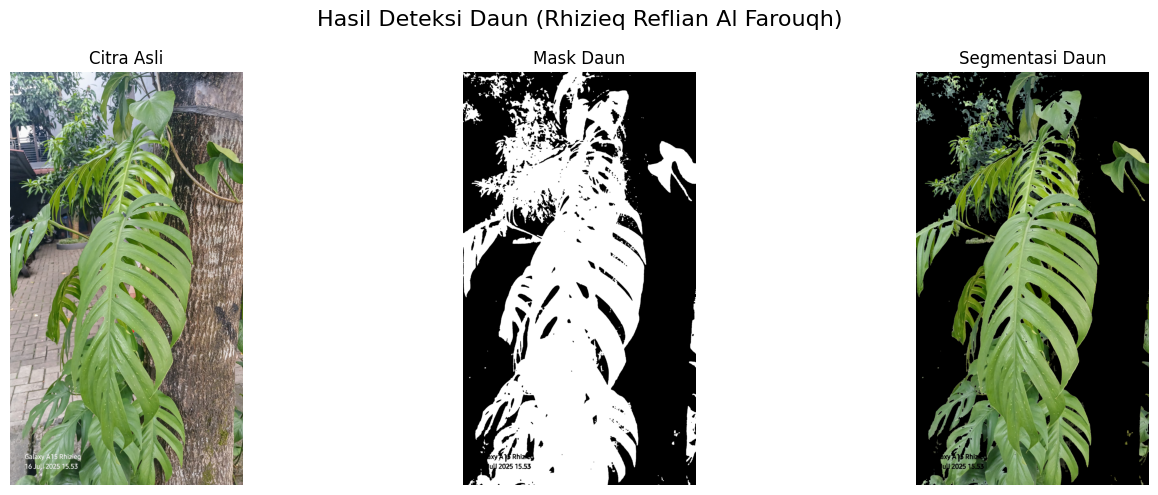

Output Deteksi Daun disimpan sebagai 'deteksi_daun_output.png'


In [2]:
image_leaf = cv2.imread('daunn.jpg')
image_leaf_rgb = cv2.cvtColor(image_leaf, cv2.COLOR_BGR2RGB)
hsv_leaf = cv2.cvtColor(image_leaf, cv2.COLOR_BGR2HSV)

# --- Proses Segmentasi Daun ---
lower_green = np.array([30, 40, 40])
upper_green = np.array([90, 255, 255])

# Membuat mask untuk warna hijau
mask_leaf = cv2.inRange(hsv_leaf, lower_green, upper_green)

# Membersihkan noise pada mask
mask_leaf = cv2.morphologyEx(mask_leaf, cv2.MORPH_OPEN, np.ones((5,5),np.uint8))
mask_leaf = cv2.morphologyEx(mask_leaf, cv2.MORPH_CLOSE, np.ones((5,5),np.uint8))

# Menerapkan mask ke gambar asli
segmented_leaf = cv2.bitwise_and(image_leaf_rgb, image_leaf_rgb, mask=mask_leaf)

# --- Menampilkan Hasil Deteksi Daun ---
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_leaf_rgb)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask_leaf, cmap='gray')
plt.title('Mask Daun')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(segmented_leaf)
plt.title('Segmentasi Daun')
plt.axis('off')

plt.suptitle('Hasil Deteksi Daun (Rhizieq Reflian Al Farouqh)', fontsize=16)
plt.tight_layout()
plt.savefig('deteksi_daun_output.png')
plt.show()
print("Output Deteksi Daun disimpan sebagai 'deteksi_daun_output.png'")
#Rhizieq Reflian Al Farouqh_202331207

## --- Bagian 2: Geometri Citra ---

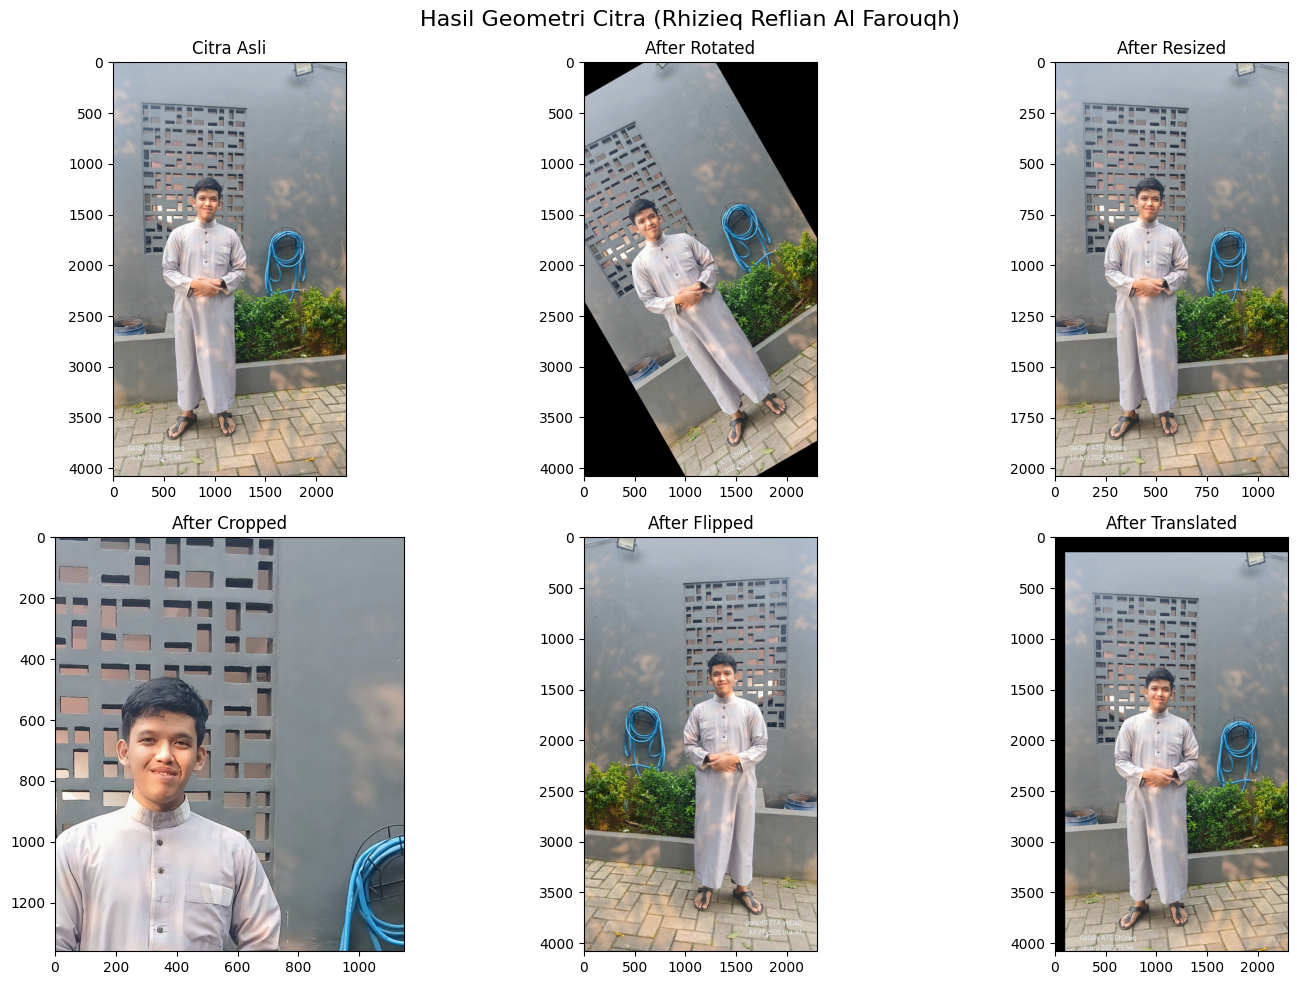

Output Geometri Citra disimpan sebagai 'geometri_citra_output.png'


In [3]:
image_geom = cv2.imread('orangg.jpg')
image_geom_rgb = cv2.cvtColor(image_geom, cv2.COLOR_BGR2RGB)
(h, w) = image_geom_rgb.shape[:2]

# --- Proses Transformasi Geometri ---
# 1. Rotasi
center = (w // 2, h // 2)
M_rot = cv2.getRotationMatrix2D(center, 30, 1.0) # Rotasi 30 derajat
rotated = cv2.warpAffine(image_geom_rgb, M_rot, (w, h))

# 2. Perubahan Ukuran (Resized)
resized = cv2.resize(image_geom_rgb, (w // 2, h // 2), interpolation=cv2.INTER_AREA)

# 3. Pemotongan (Cropped) - Fokus ke area wajah
cropped = image_geom_rgb[h//6:h//2, w//4:w-(w//4)]

# 4. Membalik (Flipped) secara horizontal
flipped = cv2.flip(image_geom_rgb, 1)

# 5. Translasi (Translated)
M_trans = np.float32([[1, 0, 100], [0, 1, 150]]) # Geser 100 ke kanan, 150 ke bawah
translated = cv2.warpAffine(image_geom_rgb, M_trans, (w, h))

# --- Menampilkan Hasil Geometri Citra ---
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1); plt.imshow(image_geom_rgb); plt.title('Citra Asli')
plt.subplot(2, 3, 2); plt.imshow(rotated); plt.title('After Rotated')
plt.subplot(2, 3, 3); plt.imshow(resized); plt.title('After Resized')
plt.subplot(2, 3, 4); plt.imshow(cropped); plt.title('After Cropped')
plt.subplot(2, 3, 5); plt.imshow(flipped); plt.title('After Flipped')
plt.subplot(2, 3, 6); plt.imshow(translated); plt.title('After Translated')

plt.suptitle('Hasil Geometri Citra (Rhizieq Reflian Al Farouqh)', fontsize=16)
plt.tight_layout()
plt.savefig('geometri_citra_output.png')
plt.show()
print("Output Geometri Citra disimpan sebagai 'geometri_citra_output.png'")
#Rhizieq Reflian Al Farouqh_202331207

## --- Bagian 3: Kompresi ---

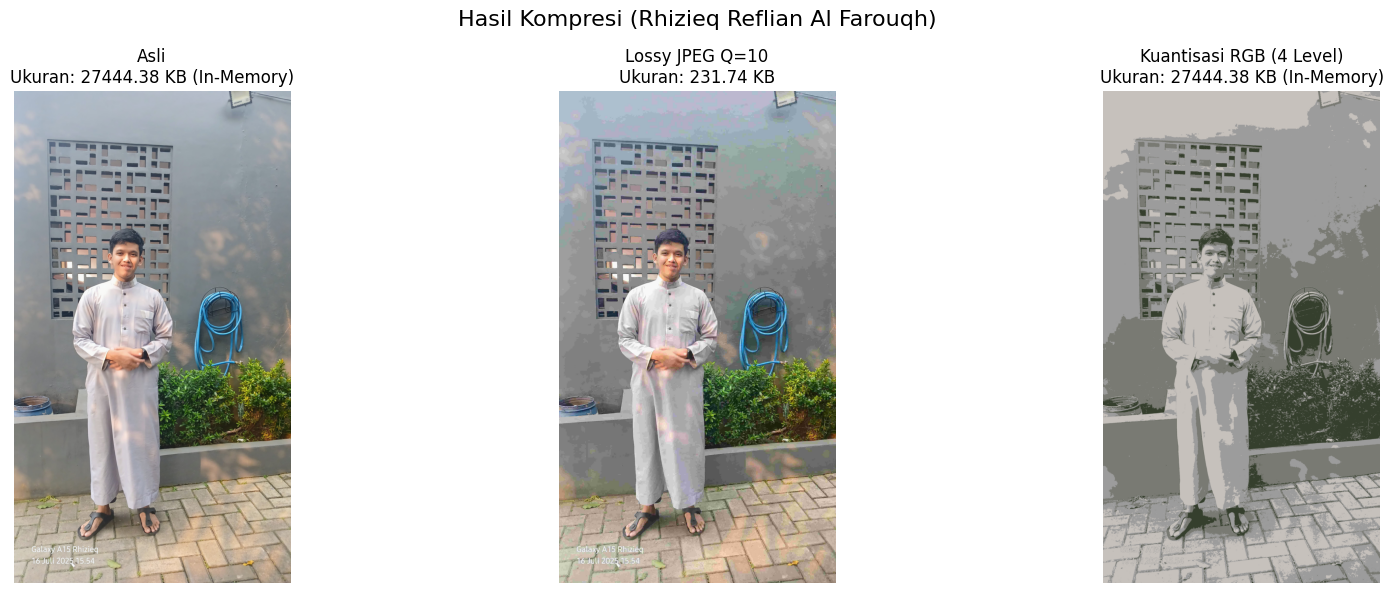

Output Kompresi disimpan sebagai 'kompresi_output.png'


In [4]:
# Menggunakan gambar yang sudah dimuat dari bagian Geometri
image_comp_rgb = image_geom_rgb

# --- Proses Kompresi ---
# 1. Kompresi Lossy JPEG dengan kualitas 10%
quality = 10
compressed_path = 'compressed_image.jpg'
cv2.imwrite(compressed_path, cv2.cvtColor(image_comp_rgb, cv2.COLOR_RGB2BGR), [int(cv2.IMWRITE_JPEG_QUALITY), quality])
compressed_image = cv2.cvtColor(cv2.imread(compressed_path), cv2.COLOR_BGR2RGB)
compressed_size = os.path.getsize(compressed_path) / 1024  # Ukuran dalam KB

# 2. Kuantisasi Warna (4 level per channel)
pixels = np.float32(image_comp_rgb.reshape((-1, 3)))
n_colors = 4
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS
_, labels, centers = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
centers = np.uint8(centers)
quantized_image = centers[labels.flatten()]
quantized_image = quantized_image.reshape(image_comp_rgb.shape)

# Menghitung ukuran memori
original_size_in_memory = image_comp_rgb.nbytes / 1024
quantized_size_in_memory = quantized_image.nbytes / 1024

# --- Menampilkan Hasil Kompresi ---
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_comp_rgb)
plt.title(f'Asli\nUkuran: {original_size_in_memory:.2f} KB (In-Memory)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(compressed_image)
plt.title(f'Lossy JPEG Q={quality}\nUkuran: {compressed_size:.2f} KB')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(quantized_image)
plt.title(f'Kuantisasi RGB (4 Level)\nUkuran: {quantized_size_in_memory:.2f} KB (In-Memory)')
plt.axis('off')

plt.suptitle('Hasil Kompresi (Rhizieq Reflian Al Farouqh)', fontsize=16)
plt.tight_layout()
plt.savefig('kompresi_output.png')
plt.show()
print("Output Kompresi disimpan sebagai 'kompresi_output.png'")